In [ ]:
import csv
import math
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

from typing import List, Dict
from src.const import StockRow, State, StateQuad
from src.utils import read_chart, read_base_chart, read_sahm, plot, moving_average
from src.sim import mume_avg, just_buy

ImportError: cannot import name 'plot_price_quad' from 'src.utils' (/Users/byungjun/00-codes/mumeparrot-backtest/src/utils.py)

In [2]:
def compute_quad_var(chart: List[StockRow], principal: float):
    QUAD_ROUND_LEN = 40
    
    history = []

    seed = principal
    ror = 1

    stock_qty = principal // chart[0].price
    stock_eval = 0

    invested_seed = stock_qty * chart[0].price
    stock_avg = 0
    remaining_seed = seed - invested_seed

    # round_quad_var = 0
    round_quad_var_list = []
    
    for index, (date, price, close_price, _) in enumerate(chart):
        stock_avg = invested_seed / stock_qty if stock_qty != 0 else 0
        stock_eval = stock_qty * close_price
        ror = (remaining_seed + stock_eval) / principal

        if index < QUAD_ROUND_LEN:
            daily_quad_var = None
            round_quad_var_list.append((math.log10(price) - math.log10(chart[0].price))**2)
        else:
            round_quad_var = sum(round_quad_var_list) / QUAD_ROUND_LEN
            daily_quad_var = round_quad_var
            round_quad_var_list.pop(0)
            round_quad_var_list.append((math.log10(price) - math.log10(chart[index - QUAD_ROUND_LEN].price))**2)

        state = StateQuad(
            date,
            principal,
            seed,
            ror,
            close_price,
            stock_qty,
            stock_qty * price,
            invested_seed,
            stock_avg,
            remaining_seed,
            daily_quad_var
        )

        history.append(state)
        prev_price = price

    return history


In [4]:
ticker = "SOXL"
start = "init"
end = "fin"

principal = 10000
sahm = read_sahm()

chart = read_chart(ticker, start, end)
base_chart = read_base_chart(ticker, start, end)
mume_avg_history1 = mume_avg(
    chart,
    principal,
    sahm,
    adjust_buy=True,
    adjust_good=True,
    adjust_sell=True,
    adjust_margin=True,
    consider_sahm=True,
)
buy_history_quad = compute_quad_var(base_chart, principal)


NameError: name 'mume_avg' is not defined

In [11]:
for i, h in enumerate(buy_history_quad):
    print(h)
    if i == 10:
        break

StateQuad(date='1999-03-10', principal=10000, seed=10000, ror=0.850889545, close_price=43.47831, stock_qty=195.0, stock_eval=9969.375, invested_seed=9969.375, stock_avg=51.125, remaining_seed=30.625, quad_var=None)
StateQuad(date='1999-03-11', principal=10000, seed=10000, ror=0.8550400029999999, close_price=43.691154, stock_qty=195.0, stock_eval=10030.3125, invested_seed=9969.375, stock_avg=51.125, remaining_seed=30.625, quad_var=None)
StateQuad(date='1999-03-12', principal=10000, seed=10000, ror=0.8342855485, close_price=42.626823, stock_qty=195.0, stock_eval=9969.375, invested_seed=9969.375, stock_avg=51.125, remaining_seed=30.625, quad_var=None)
StateQuad(date='1999-03-15', principal=10000, seed=10000, ror=0.858153529, close_price=43.850822, stock_qty=195.0, stock_eval=9835.3125, invested_seed=9969.375, stock_avg=51.125, remaining_seed=30.625, quad_var=None)
StateQuad(date='1999-03-16', principal=10000, seed=10000, ror=0.8654175325, close_price=44.223335, stock_qty=195.0, stock_eval

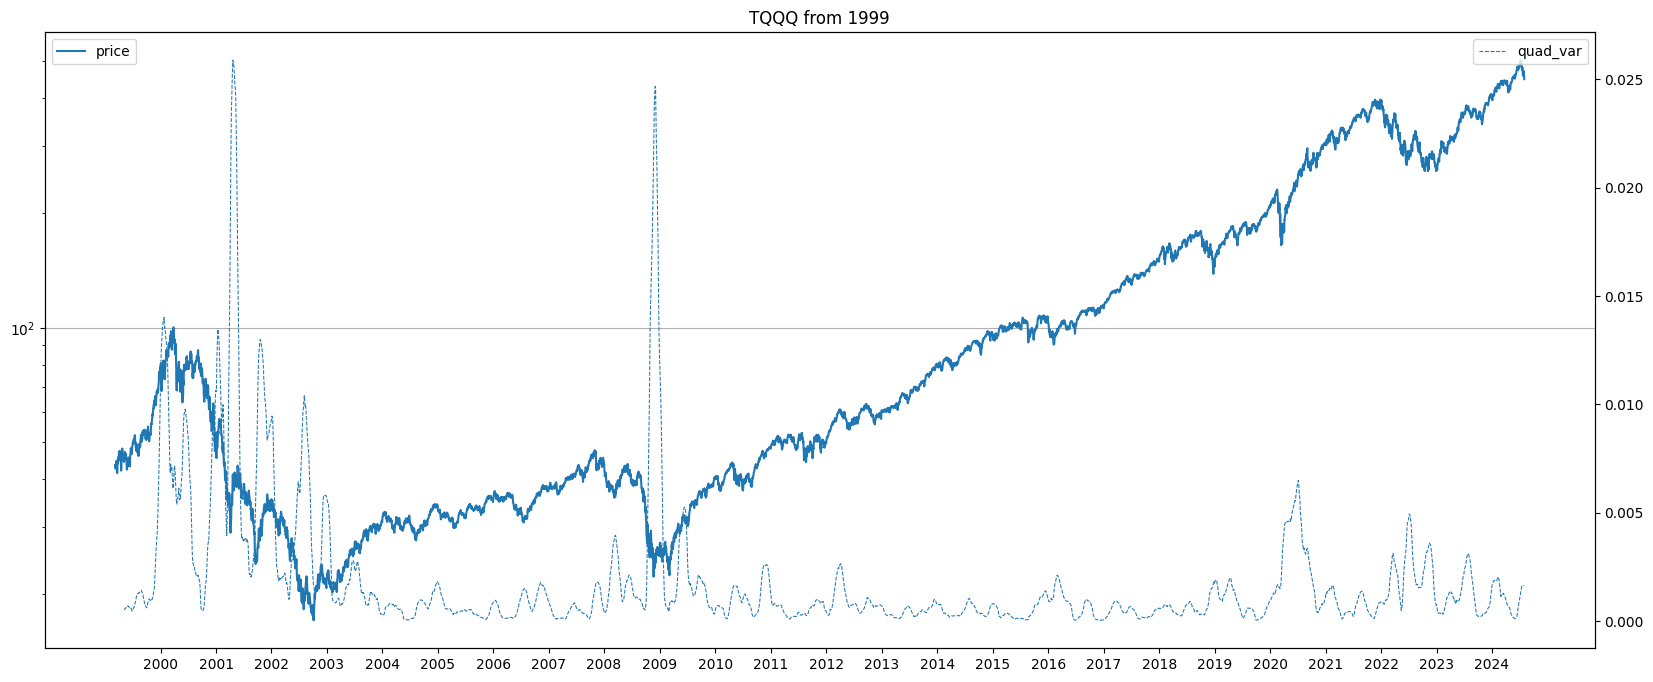

In [8]:
plot_price_quad(
    ticker,
    {
        "just-buy": buy_history_quad,
        # "mumeparrot": mume_avg_history1
    },
    log=True,
    quad=True
)

5800
0 StockRow(date='2001-07-13', price=118.64854751238832, close_price=119.2229197154019, rsi=50.0) 2001 07 13
1 StockRow(date='2001-07-16', price=112.82278075012387, close_price=99.01840970109902, rsi=50.0) 2001 07 16
2 StockRow(date='2001-07-17', price=96.89161758950503, close_price=111.00827710585679, rsi=50.0) 2001 07 17
3 StockRow(date='2001-07-18', price=100.95910208329386, close_price=97.4525586479284, rsi=50.0) 2001 07 18
4 StockRow(date='2001-07-19', price=115.00258498507696, close_price=109.28423862262724, rsi=50.0) 2001 07 19
5 StockRow(date='2001-07-20', price=102.60745378610632, close_price=107.4620043999631, rsi=34.65349771977577) 2001 07 20
6 StockRow(date='2001-07-23', price=109.28210434454803, close_price=97.54865735176496, rsi=46.66677751624753) 2001 07 23
7 StockRow(date='2001-07-24', price=95.84474215359813, close_price=89.74043244580096, rsi=48.96590824103086) 2001 07 24
8 StockRow(date='2001-07-25', price=88.73363740532295, close_price=84.93646142908734, rsi=38.

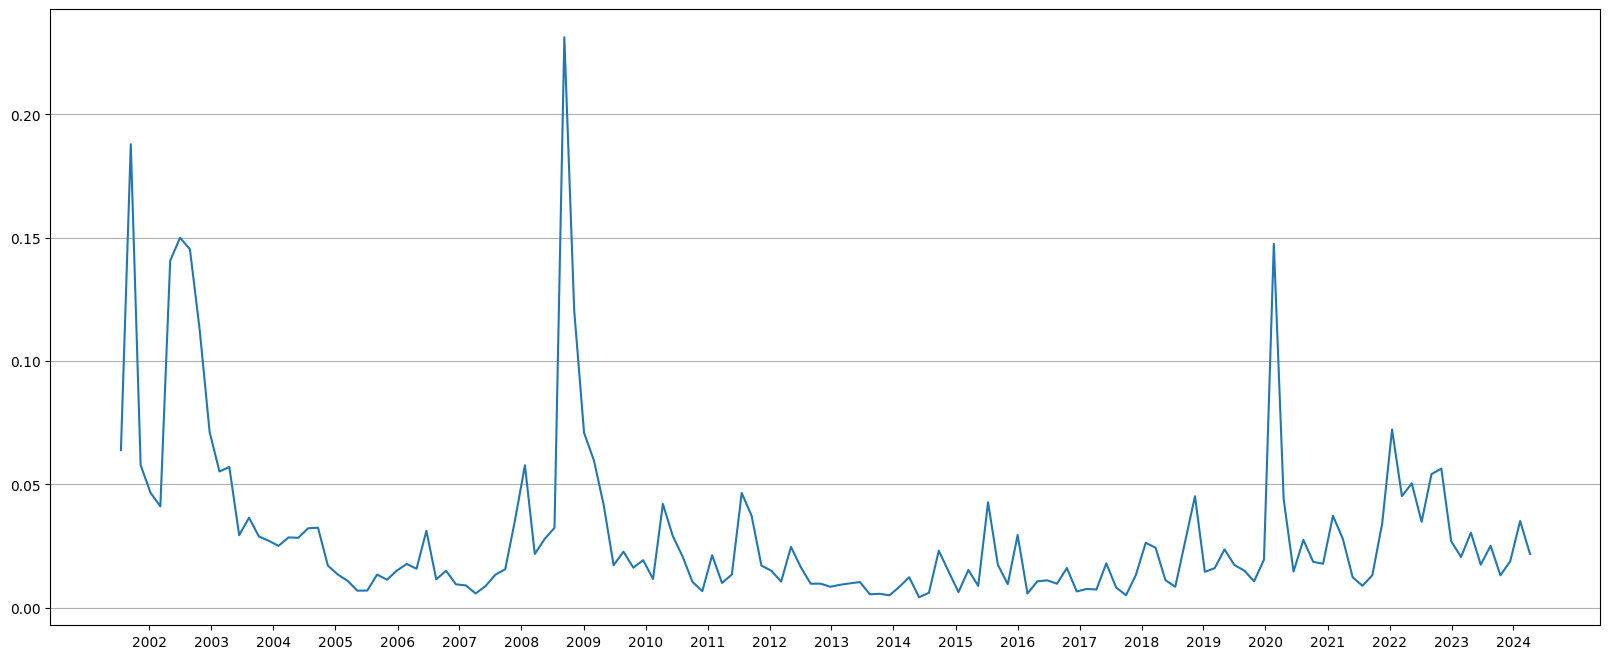

In [3]:
print(len(chart))
round_len = 40
quad_var_round = 0
quad_var_list = []

xticks = []
xticklabels = []
last_year = ""

for data_idx, daily_data in enumerate(chart):
    date = daily_data.date
    year = date.split("-")[0]
    month = date.split("-")[1]
    day = date.split("-")[2]
    print(data_idx, daily_data, year, month, day)

    if year != last_year and month == "01":
        xticks.append(data_idx)
        xticklabels.append(year)
        print(data_idx, year)
        last_year = year

    if data_idx > 0:
        daily_quad_var = (math.log10(float(daily_data.price)) - math.log10(float(prevDailyPrice)))**2
        quad_var_round += daily_quad_var

        if data_idx % round_len == 0:
            quad_var_list.append(quad_var_round)
            quad_var_round = 0
        
    prevDailyPrice = daily_data.price

print(len(quad_var_list))
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.plot([x * round_len for x in range(len(quad_var_list))], quad_var_list)
ax.grid(axis="y")
plt.show()

In [4]:
plot(
    ticker,
    {
        "just-buy": buy_history[::40],
        # "mumeparrot": buy_history
    },
)
